## Observations and Insights 

# Preparation of data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# To sort on alphabetical order of mouse id
sort_meta_data = mouse_metadata.sort_values(by = ["Mouse ID"])
sort_mouse_study = study_results.sort_values(by = ["Mouse ID"])
# Combine the data into a single dataset
mouse_results_data = sort_meta_data.merge(sort_mouse_study, on = "Mouse ID")
mouse_results_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,40,63.593490,2
4,a203,Infubinol,Female,20,23,35,61.931650,2
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,20,57.898778,2
1890,z969,Naftisol,Male,9,30,5,49.332999,0
1891,z969,Naftisol,Male,9,30,35,69.176246,4


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_results_data["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results_data.loc[mouse_results_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice                                                                                


array(['g989'], dtype=object)

In [4]:
#Previous output indicated duplicate mouse of "g989"
#Printed dataframe output for duplicate mouse only
duplicate_mouse_data = mouse_results_data.loc[mouse_results_data["Mouse ID"] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,15,51.325852,1
588,g989,Propriva,Female,21,26,20,55.326122,1
589,g989,Propriva,Female,21,26,0,45.000000,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,53.442020,0
593,g989,Propriva,Female,21,26,5,48.786801,0
594,g989,Propriva,Female,21,26,30,59.082294,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Data output with mouse "g989" removed from data set. 
all_g989_data = mouse_results_data["Mouse ID"]
mouse_results_data[all_g989_data.isin(all_g989_data[all_g989_data.duplicated()])]
all_g989_data

0       a203
1       a203
2       a203
3       a203
4       a203
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [6]:
# Created a clean DataFrame by dropping the duplicate mouse by its ID for "g989".
cleaned_data_frame = mouse_results_data[mouse_results_data["Mouse ID"].isin(duplicate_mice)==False]
cleaned_data_frame_final = cleaned_data_frame.reset_index()
cleaned_data_frame_final

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,a203,Infubinol,Female,20,23,0,45.000000,0
1,1,a203,Infubinol,Female,20,23,5,48.508468,0
2,2,a203,Infubinol,Female,20,23,25,56.793208,1
3,3,a203,Infubinol,Female,20,23,40,63.593490,2
4,4,a203,Infubinol,Female,20,23,35,61.931650,2
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,20,57.898778,2
1877,1890,z969,Naftisol,Male,9,30,5,49.332999,0
1878,1891,z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame - duplicate mouse removed.
len(cleaned_data_frame_final["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Used new variable to bring up header column of "Drug Regimen"
drugs_used = cleaned_data_frame_final["Drug Regimen"].unique()
drugs_used

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [9]:
# Generated summary statistics table for mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen.
# Used groupby method to find the summary statistics.
regimen_mean = cleaned_data_frame_final.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
print(regimen_mean)
regimen_median = cleaned_data_frame_final.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
print(regimen_median)
regimen_variance = cleaned_data_frame_final.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
print(regimen_variance)
regimen_stdv = cleaned_data_frame_final.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
print(regimen_stdv)
regimen_sem = cleaned_data_frame_final.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print(regimen_sem)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [10]:
#Used the pd.DataFrame
statistical_summary_1 = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_variance,
    "Standard Deviation": regimen_stdv,
    "SEM": regimen_sem
})
statistical_summary_1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen.

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = cleaned_data_frame_final.groupby("Drug Regimen")
statistical_summary_2 = agg_method.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
statistical_summary_2

C:\Users\Vishaan\AppData\Local\Temp/ipykernel_18384/1710169309.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  statistical_summary_2 = agg_method.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

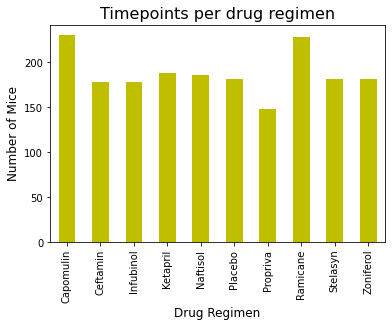

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data_timepoints = cleaned_data_frame_final.groupby("Drug Regimen").count()["Mouse ID"]

#plot the chart
bar_chart = data_timepoints.plot(kind = "bar", color = "y")
plt.title("Timepoints per drug regimen",fontsize=16)
plt.ylabel("Number of Mice",fontsize=12)
plt.xlabel("Drug Regimen", fontsize=12)

#Show the chart
plt.show()


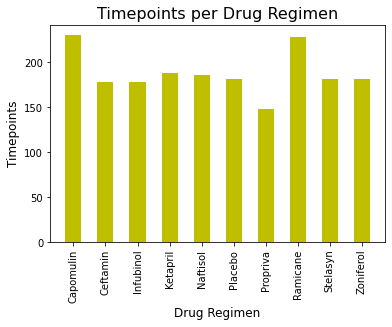

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data_timepoints = cleaned_data_frame_final.groupby("Drug Regimen").count()["Timepoint"]
#Obtain x_axis length of drug regimen
x_axis = np.arange(len(data_timepoints))
ticks = [x for x in x_axis]
#To plot the chart
plt.bar(x_axis, data_timepoints, color = "y", label = "Mouse ID", width = 0.5)
#Plot the ticks for the x_axis
plt.xticks(ticks, data_timepoints.index,rotation=90)
#Set labels
plt.title("Timepoints per Drug Regimen", fontsize=16)
plt.xlabel("Drug Regimen",fontsize=12)
plt.ylabel("Timepoints", fontsize=12)

#Show the plot
plt.show()


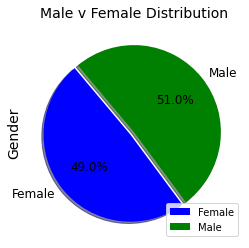

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# To get the count of each gender
gender_of_mice = cleaned_data_frame_final.groupby("Sex").count()["Mouse ID"]
# Create plot wars
colors = ["blue", "green"]
explode = (0.05,0)
title = "Male v Female Distribution"
# Create pie chart
gender_for_pie = gender_of_mice.plot(kind ='pie', shadow=True, autopct="%1.1f%%",
                                     explode=explode, colors=colors,
                                     textprops={'color':'k', 'size': 12, 'weight': 500},
                                     startangle=130)
#Set labels
gender_for_pie.set_ylabel("Gender", fontsize=14)
plt.title(title,fontsize=14)
plt.legend(loc='lower right')
#Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

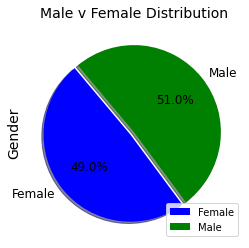

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "green"]
explode = (0.05,0)
#Plot with matplotlib
plt.pie(gender_of_mice, explode=explode,labels=gender_of_mice.index,colors=colors,
       autopct="%1.1f%%", shadow=True, textprops={'color': 'k', 'size': 12, 'weight': 500}, startangle=130)

#Set labels
plt.title('Male v Female Distribution', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.legend(loc="lower right")
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_tumor_df = new variable made for finding the maximum timepoints
final_tumor = cleaned_data_frame_final.groupby(["Mouse ID"]).max().reset_index()
#merge_data variable created for final tumor volumes
merge_data = final_tumor[["Mouse ID", "Timepoint"]].merge(cleaned_data_frame_final,
                                                          on = ["Mouse ID", "Timepoint"], how = "left")

In [17]:
# Capomulin
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.
cap = merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
cap_quantiles = cap.quantile([0.25, 0.5, 0.75])
cap_lower_q = cap_quantiles[0.25]
cap_upper_q = cap_quantiles[0.75]
cap_iqr = cap_upper_q - cap_lower_q
cap_lower_bound = cap_lower_q-(1.5*cap_iqr)
cap_upper_bound = cap_upper_q+(1.5*cap_iqr)
print(f'Capomulin potential outliers: {cap.loc[(cap<cap_lower_bound) | (cap>cap_upper_bound)]}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [18]:
# Ramicane
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.
ram = merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
ram_quantiles = ram.quantile([0.25, 0.5, 0.75])
ram_lower_q = ram_quantiles[0.25]
ram_upper_q = ram_quantiles[0.75]
ram_iqr = ram_upper_q - ram_lower_q
ram_lower_bound = ram_lower_q-(1.5*ram_iqr)
ram_upper_bound = ram_upper_q+(1.5*ram_iqr)
print(f'Ramicane potential outliers: {ram.loc[(ram<ram_lower_bound) | (ram>ram_upper_bound)]}')

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [19]:
# Infubinol
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.
inf = merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
inf_quantiles = inf.quantile([0.25, 0.5, 0.75])
inf_lower_q = inf_quantiles[0.25]
inf_upper_q = inf_quantiles[0.75]
inf_iqr = inf_upper_q - inf_lower_q
inf_lower_bound = inf_lower_q-(1.5*ram_iqr)
inf_upper_bound = inf_upper_q+(1.5*ram_iqr)
print(f'Infubinol potential outliers: {inf.loc[(inf<inf_lower_bound) | (inf>inf_upper_bound)]}')

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [20]:
# Ceftamin
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.
cef = merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
cef_quantiles = cef.quantile([0.25, 0.5, 0.75])
cef_lower_q = cef_quantiles[0.25]
cef_upper_q = cef_quantiles[0.75]
cef_iqr = cef_upper_q - cef_lower_q
cef_lower_bound = cef_lower_q-(1.5*ram_iqr)
cef_upper_bound = cef_upper_q+(1.5*ram_iqr)
print(f'Ceftamin potential outliers: {cef.loc[(cef<cef_lower_bound) | (cef>cef_upper_bound)]}')

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


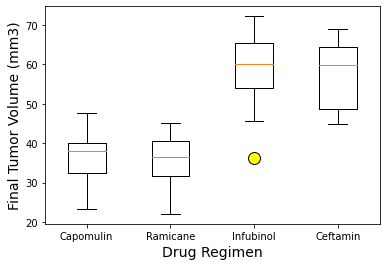

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor = 'yellow', markersize = 12, marker = 'o')
plt.boxplot([cap, ram, inf, cef], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = outlier)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=14)

plt.show()

## Line and Scatter Plots

In [22]:
#Confirming a mouse was treated with m601 using the excel file with mouse meta data.
mouse_spec_data = cleaned_data_frame_final.loc[cleaned_data_frame_final['Mouse ID'] == 'm601',:]
#Used the sort_values as the timepoints were incorrectly positioned in the data frame.
mouse_spec_data_timepoint = mouse_spec_data.sort_values("Timepoint")
mouse_spec_data_timepoint

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
984,997,m601,Capomulin,Male,22,17,0,45.000000,0
979,992,m601,Capomulin,Male,22,17,5,41.408591,1
981,994,m601,Capomulin,Male,22,17,10,36.825367,1
978,991,m601,Capomulin,Male,22,17,15,35.464612,1
980,993,m601,Capomulin,Male,22,17,20,34.255732,1
977,990,m601,Capomulin,Male,22,17,25,33.118756,1
982,995,m601,Capomulin,Male,22,17,30,31.758275,1
986,999,m601,Capomulin,Male,22,17,35,30.834357,1
983,996,m601,Capomulin,Male,22,17,40,31.378045,1
985,998,m601,Capomulin,Male,22,17,45,28.430964,1


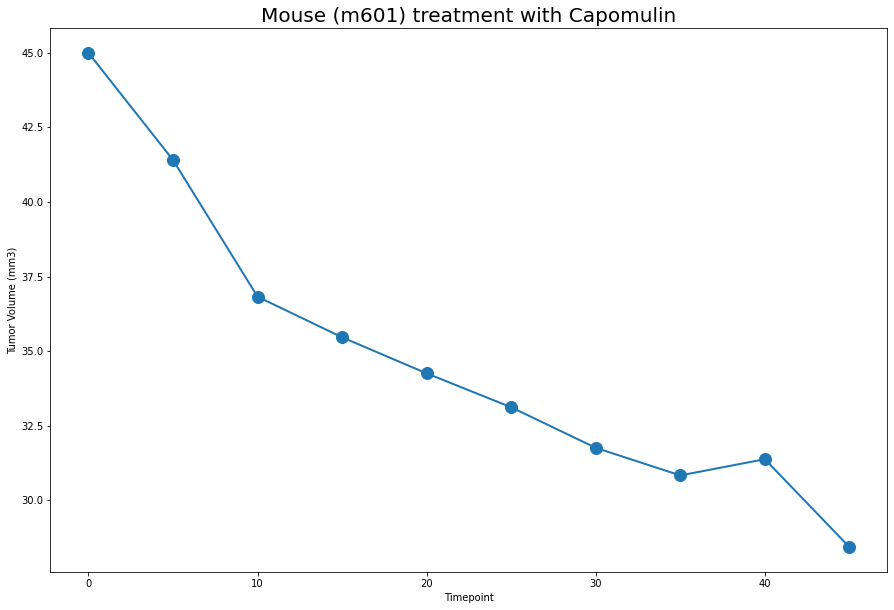

In [23]:
# Generate a line plot of Tumor Volume vs. Timepoint for a mouse treated with Capomulin.
# x_axis would equal timepoint
# y_axis would equal tumor volume
x_axis = mouse_spec_data_timepoint['Timepoint']
y_axis = mouse_spec_data_timepoint['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Mouse (m601) treatment with Capomulin", fontsize = 20) 
plt.plot(x_axis, y_axis, linewidth = "2", markersize = 12, marker = "o")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

In [24]:
# Generate a scatter plot of average tumor volume versus mouse weight for the Capomulin treatment regimen.
# Obtained cleaned data frame and looking at Drug regimen header with only wanting 'Capomulin'
capomulin_df = cleaned_data_frame_final.loc[cleaned_data_frame_final["Drug Regimen"] == "Capomulin",:]
capomulin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,174,b128,Capomulin,Female,9,22,10,43.270852,0
175,175,b128,Capomulin,Female,9,22,5,45.651331,0
176,176,b128,Capomulin,Female,9,22,0,45.000000,0
177,177,b128,Capomulin,Female,9,22,30,40.605335,1
178,178,b128,Capomulin,Female,9,22,15,43.784893,0
...,...,...,...,...,...,...,...,...,...
1818,1831,y793,Capomulin,Male,17,17,0,45.000000,0
1819,1832,y793,Capomulin,Male,17,17,30,35.726023,2
1820,1833,y793,Capomulin,Male,17,17,25,38.992734,2
1821,1834,y793,Capomulin,Male,17,17,20,40.716428,2


In [25]:
#Finding the mean from the filtered capomulin grouping only.
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()
capomulin_average

,index,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,
b128,178.5,9.0,22.0,22.5,41.963636,0.70
b742,211.5,7.0,21.0,22.5,40.083699,0.00
f966,497.0,16.0,17.0,10.0,36.505973,0.00
g288,517.5,3.0,19.0,22.5,41.990097,0.80
g316,537.5,22.0,22.0,22.5,44.613344,1.00
i557,655.5,1.0,24.0,22.5,44.805810,0.20
i738,681.5,23.0,20.0,22.5,39.141053,0.60
j119,701.5,7.0,23.0,22.5,44.465236,0.60
j246,715.5,21.0,21.0,17.5,43.216925,0.25


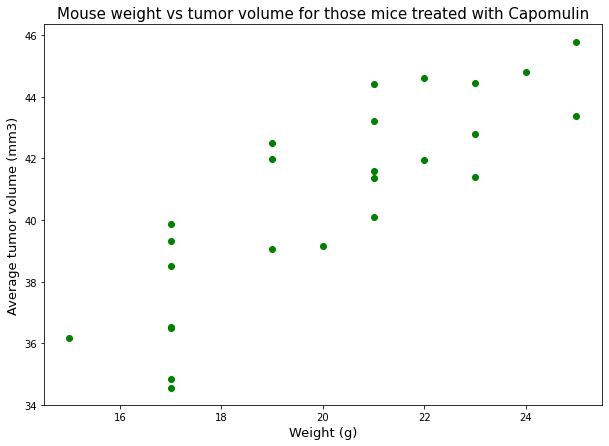

In [26]:
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()

#variable = x label('Weight (g)')
#variable = y label('Tumor Volume (mm3)')
x_axis = capomulin_average['Weight (g)']
y_axis = capomulin_average['Tumor Volume (mm3)']

plt.figure(figsize = (10,7))

plt.scatter(x_axis, y_axis, facecolors = 'green', label = "mouse")

#Applying the title and labels
plt.title("Mouse weight vs tumor volume for those mice treated with Capomulin", fontsize = 15)
plt.xlabel("Weight (g)", fontsize = 13)
plt.ylabel("Average tumor volume (mm3)", fontsize = 13)

#Plot the scatter
plt.show()



## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Using the pearsons formula() and used the cap_average dataframe to pull the p value
# The linear value says there's a high degree of correlation if the number is close to 1

#Calculate the correlation coefficient and linear regression model
#Using the previous data of capomulin _average for weight (g) and for average tumor volume (mm3)
corr=round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between weight (g) and average tumor volume (mm3) is {corr}")

The correlation coefficient between weight (g) and average tumor volume (mm3) is 0.84


The equation of the regression line is y =  0.95x + 21.55


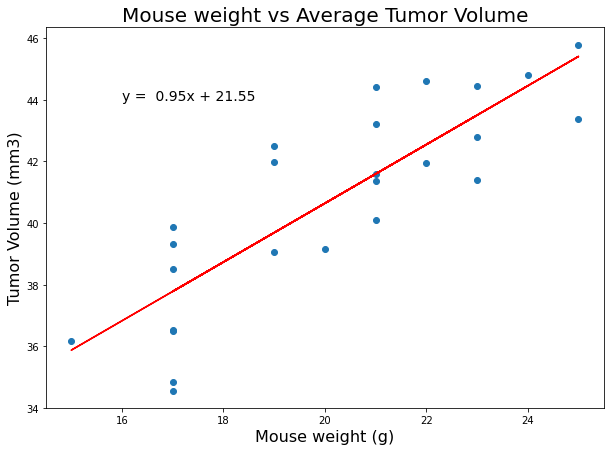

In [28]:
# Print out the r-squared value along with the plot for the fiquire to be shown.
# creating the variables for both x_axis and y_axis
x_value = capomulin_average['Weight (g)']
y_value = capomulin_average['Tumor Volume (mm3)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

#line_equation = formula of y = mx + b
line_equation = f"y =  {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize = (10,7))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values,"r-")
plt.title("Mouse weight vs Average Tumor Volume", fontsize = 20)
plt.xlabel("Mouse weight (g)", fontsize = 16)
plt.ylabel("Tumor Volume (mm3)", fontsize = 16)
plt.annotate(line_equation,(16,44), fontsize = 14)

print(f"The equation of the regression line is {line_equation}")
plt.show()
